In [ ]:
!git clone https://github.com/stuniy/SPO_PGU.git

Cloning into 'SPO_PGU'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 95 (delta 7), reused 0 (delta 0), pack-reused 69
Unpacking objects: 100% (95/95), done.


# Ансамбли. Бустинг

Другой вид ансамблей это бустинг (от англ. boosting - улучшение), когда модели строятся последовательно, каждая следующая пытается скомпенсировать ошибки предыдущей, а общий результат - какая-то смесь результатов моделей из ансамбля. Много видов бустинга предложено, мы познакомимся только с некоторыми из них.

Бустинг (англ. boosting — улучшение, усиление) — это процедура последовательного направленного построения ансамбля моделей  машинного обучения, когда каждый следующий алгоритм стремится компенсировать ошибки предыдущих алгоритмов. Изначально понятие бустинга возникло  в связи с вопросом: возможно ли, имея множество относительно  слабых (незначительно отличающихся от случайных) и простых моделей, построить сильную модель?

Бустинг над решающими деревьями считается одним из наиболее эффективных методов с точки зрения качества классификации. Во многих экспериментах наблюдалось практически неограниченное уменьшение частоты ошибок на независимой тестовой выборке по мере наращивания композиции. Более того, качество на тестовой выборке часто продолжало улучшаться даже после достижения безошибочного распознавания всей обучающей выборки. Это перевернуло существовавшие долгое время представления о том, что для повышения обобщающей способности необходимо ограничивать сложность алгоритмов. На примере бустинга стало понятно, что хорошим качеством могут обладать сколь угодно сложные композиции, если их правильно настраивать.

Впоследствии феномен бустинга получил теоретическое обоснование. Оказалось, что взвешенное голосование не увеличивает эффективную сложность алгоритма, а лишь сглаживает ответы базовых алгоритмов. Количественные оценки обобщающей способности бустинга формулируются в терминах отступа. Эффективность бустинга объясняется тем, что по мере добавления базовых алгоритмов увеличиваются отступы обучающих объектов. Причём бустинг продолжает раздвигать классы даже после достижения безошибочной классификации обучающей выборки.

К сожалению, теоретические оценки обобщающей способности дают лишь качественное обоснование феномену бустинга. Хотя они существенно точнее более общих оценок Вапника-Червоненкиса, всё же они сильно завышены, и требуемая длина обучающей выборки оценивается величиной порядка $10^4 ... 10^6$. Более основательные эксперименты показали, что иногда бустинг всё же переобучается.


## Adaboost

Алгоритм AdaBoost (сокр. от adaptive boosting) — алгоритм машинного обучения, предложенный Йоавом Фройндом (Yoav Freund) и Робертом Шапиром (Robert Schapire). Является мета-алгоритмом, в процессе обучения строит композицию из базовых алгоритмов обучения для улучшения их эффективности. AdaBoost является алгоритмом адаптивного бустинга в том смысле, что каждый следующий классификатор строится по объектам, которые плохо классифицируются предыдущими классификаторами.

AdaBoost вызывает слабый классификатор в цикле. После каждого вызова обновляется распределение весов, которые отвечают важности каждого из объектов обучающего множества для классификации. На каждой итерации веса каждого неверно классифицированного объекта возрастают, таким образом новый классификатор «фокусирует своё внимание» на этих объектах.

Один из популярных видов бустинга это метод Adaboost  (сокращение от Adaptive Boosting) и различные его модификации.

Идея Adaboost довольно проста:
* давайте будем обучать модели использую функцию ошибки, в которой каждому обучающему примеру назначен некоторый вес, который регулирует насколько важна ошибка на этом примере. Назначим маленький вес - ошибка на примере почти не будет влиять на общую ошибку, а назначим большой вес - ошибка на таком примере сразу даст большую общую ошибку.
* Обучим первую модель, изначально все веса для обучающих примеров выберем одинаковыми (равными единица поделить на число примеров). Эта модель на каких-то примерах будет иметь большую ошибку, на каких-то маленькую.
* Пересчитаем веса примеров так, чтобы сделать их побольше для примеров на которых большая ошибка, и поменьше для примеров, на которых ошибка первой модели маленькая (чтобы не было вычислительных проблем будем всегда считать так, чтобы сумма всех весов была равна 1).
* Обучим вторую модель на тех же самых примерах, но теперь у этих примеров будут другие веса с предыдущего шага, и как результат, ошибка тоже будет другая. И для этой модели посмотрим на каких примерах ошибка маленькая, на каких большая, и изменим веса аналогично предыдущему пункту - увеличим их для примеров с большой ошибкой и уменьшим для примеров с маленькой ошибкой.
* Будем продолжать обучать все новые и новые модели на тех же примерах, но с другими весами, пока нам не надоест или не достигнем какого-то условия остановки обучения.
* В конечном итоге у нас будет много обученных моделей и общий результат возьмем как некоторое взвешенное среднее от результатов каждой модели (конкретные коэффициенты в таком среднем зависят от ошибки каждой модели).

<details> 
 <summary> <i>Дополнительно:</i> (нажмите)</summary>

    Если вам интересны конкретные формулы такого расчета, то можете посмотреть их в работах:
    - для классификации:  J. Zhu, H. Zou, S. Rosset, T. Hastie. “Multi-class AdaBoost”, 2009.
    - для регрессии: Drucker. “Improving Regressors using Boosting Techniques”, 1997.
    
</details>
 

![img](https://drive.google.com/uc?id=1pUrowUwjA57b5l05nVFZAE6tnxYyEgV7)

В библиотеке `sklearn` в модуле `ensemble` метод Adaboost реализован в функциях [`AdaBoostClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) для задач классификации и [`AdaBoostRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor) для задач регрессии. 

Можем задать аргументы:  
- `base_estimator` — базовый алгоритм модели в ансамбле. По умолчанию используется DecisionTreeClassifier(max_depth=1).
- `n_estimators` — максимальное количество моделей в ансамбле, после которого бустинг прекращается. Если ансамбль полностью обучится раньше, то моделей будет меньше.
- `learning_rate` — ограничивает вклад каждой модели в изменение весовых коэффициентов, по умолчанию равно 1. Снижение этого параметра будет означать, что весовые коэффициенты будут изменяться в меньшей степени, вынуждая модель дольше обучаться (но иногда повышается качество обучения).
- и другие.

Объекты Adaboost имеют атрибуты:
* `base_estimator_` - тип моделей в ансамбле.
* `estimators_` - список обученных моделей ансамбля.
* `estimator_weights_`-  вклад (вес) каждой модели в результат ансамбля
* `estimator_errors_` - ошибка каждой модели в ансамбле 
* `feature_importances_` - важность признаков (если есть у базовой модели)

у классификатора есть еще
* `classes_` - метки классов
* `n_classes_` - число классов

Реализованы методы, аналогичные другим моделям `fit()`,`predict()` и прочие, но есть и специфичные:
* `staged_decision_function(self, X)` - для классификатора вычисляет уровни принадлежности к классу для каждой модели ансамбля по мере их создания, удобно для наблюдения за процессом обучения  
* `staged_predict(self, X)` - вычисляет выходы для каждой модели ансамбля
* `staged_score(self, X, y[, sample_weight])` - вычисляет ошибки для каждой модели ансамбля.
* и другие	

Давайте реализуем это метод Adaboost для классификации.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier # подключим модуль Adaboost
from sklearn import datasets # наборы данных
from sklearn.model_selection import train_test_split # разделение на обучение и тест
from sklearn import metrics # метрики

iris = datasets.load_iris() # загрузим набор данных ирисов

X = iris.data # входы (признаки)
y = iris.target # указания учителя

# разделим данные на обучающие и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# создадим Adaboost классификатор, по умолчанию - на основе деревьев
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# обучим его
model = abc.fit(X_train, y_train)
# проверим на тесте
y_pred = model.predict(X_test)
# посчитаем метрики
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.9333333333333333


In [ ]:
abc.feature_importances_

array([0.  , 0.  , 0.42, 0.58])

Аналогично с другими базовыми моделями. Например на основе машины опорных векторов SVC:

In [ ]:
from sklearn.svm import SVC
# создаем базовый классификатор
svc=SVC(probability=True, kernel='linear')
# создаем Adaboost классификатор из них
abc = AdaBoostClassifier(base_estimator=svc, n_estimators=50, learning_rate=1)

# обучаем
model = abc.fit(X_train, y_train)
# тестируем
y_pred = model.predict(X_test)
# считаем метрики
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


Посмотрим как изменяется ошибка каждой следующей модели в ансамбле в обучении при разных величинах шага `learning_rate`, изменяйте его.

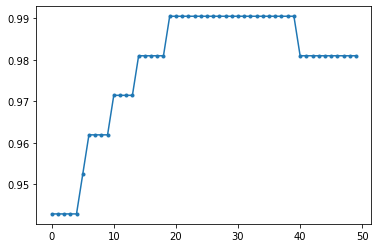

In [ ]:
# посмотрим как изменялась ошибка при обучении
from matplotlib import pyplot as plt
learning_rate=0.1
abc = AdaBoostClassifier(base_estimator=svc, n_estimators=50, learning_rate=learning_rate)
model = abc.fit(X_train, y_train)
score=[ s for s in abc.staged_score(X_train, y_train)]
plt.plot(score,marker='.')
#plt.yscale('log')

# Градиентный бустинг. Xgboost

Градиентный бустинг - класс алгоритмов, представляющих бустинг как процесс градиентного спуска. В основе алгоритма лежит последовательное уточнение функции, представляющей собой линейную комбинацию базовых классификаторов, с тем чтобы минимизировать дифференцируемую функцию потерь. Градиентный бустинг  - это один из самых универсальных и сильных методов машинного обучения, известных на сегодняшний день. В частности, на градиентном бустинге над деревьями решений основан алгоритм ранжирования  выдачи  компании Яндекс.

Другая идея бустинга заключается в следующем:
* Пусть мы имеем входы **X** и указания учителя **Y**.
* Обучим первую модель на этих данных, если модель простая,  то обучение будет не очень точным и выход модели будет **F1**, а должны были получить **Y**
* Обучим вторую модель на тех же данных, но для нее указания учителя сделаем **Y-F1**, получим выход **F2**, который тоже может отличаться от желаемого. 
* тогда обучим третью модель, для которой указания учителя будут **Y-F2**, получим выход **F3**.
* будем продолжать обучать все новые и новые модели, пока не надоест или пока не достигнем хорошего обучения или других критериев останова. 
* Результат ансамбля, выход F=F1+F2+F3+...

Если внимательно присмотреться, то величина **(Y - F1)** это градиент по **F1** (со знаком минус) от средневквадратичной ошибки \\(0.5*(Y-F1)^2\\), потому такой бустинг называют ["градиентный бустинг"](https://en.wikipedia.org/wiki/Gradient_boosting), а величины **(Y - F1)** - "остатками" (residuals). 

Для более общего случая, когда функция ошибки не среднеквадратичная, процесс аналогичен:
* Для начальной модели выберем, например, начальную функцию константой, F_0=С, константу можно подобрать оптимальной для функции ошибки.
* в цикле по количеству моделей в ансамбле 
    * посчитаем остаток как минус градиент функции ошибки по выходам F текущего ансамбля
    * создадим и обучим новую модель компенсировать этот остаток (т.е. остаток это указание учителя в обучении), ее выход F_i.
    * Посчитаем новый выход ансамбля как **F_new=F_old+(вес_i) * F_i**  добавив выход новой модели с  некоторым весом, оптимальное значение которого можно найти. 
* в конечном итоге получим выход всего обученного ансамбля.


Для улучшения метода можно обучать новые модели не на том же наборе данных а на *бутстрапе* его, как делали для случайного леса.

Множество реализаций градиентного бустинга существуют. В `sklearn` есть [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)  и 
[`GradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) для градиентного бустинга деревьев, но наверное одна из наиболее известных это реализация [**xgboost**](https://xgboost.readthedocs.io/en/latest/parameter.html) сделанная в одноименной библиотеке. Хоть это другая библиотека, синтаксис очень похож, в [`XGBClassifier`](https://xgboost.readthedocs.io/en/latest/python/python_api.html?highlight=xgbclassifier#xgboost.XGBClassifier) и [`XGBRegressor`](https://xgboost.readthedocs.io/en/latest/python/python_api.html?highlight=xgbregressor#xgboost.XGBRegressor) реализован бустинг деревьев и линейных моделей. Посмотрим пример.






In [ ]:
import numpy #
import xgboost # подключим библиотеку XGboost
from sklearn.metrics import accuracy_score #
from sklearn.model_selection import train_test_split #
import pandas as pd
# загрузим данные для классификации
dataset = pd.read_csv('/content/SPO_PGU/diabetes.csv', delimiter=",")

# в них последний столбец это класс, остальные - признаки
X = dataset.iloc[:,:7]# помним, что в срезе последний элемент не входит в диапазон 
Y = dataset.iloc[:,8] #
# разделяем данные на обучающие и тестовые
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# обучаем градиентный бустинг деревьев (по умолчанию)
model = xgboost.XGBClassifier() # создаем объект
model.fit(X_train, y_train) # обучаем его

# вычисляем выход на тесте
predictions = model.predict(X_test) #

# считаем точность
accuracy = accuracy_score(y_test, predictions) #
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.38%


Количество слабых учеников (т.е. Деревьев регрессии) контролируется параметром `n_estimators`; Размер каждого дерева можно контролировать либо путем установки глубины дерева через, `max_depth` либо путем установки количества конечных узлов через `max_leaf_nodes`. Это `learning_rate` гиперпараметр в диапазоне (0,0, 1,0), который контролирует переоснащение посредством усадки .

**Примечание**
Классификация с более чем двумя классами требует индукции `n_classes` деревьев регрессии на каждой итерации, таким образом, общее количество индуцированных деревьев равно` n_classes * n_estimators`. Для наборов данных с большим количеством классов мы настоятельно рекомендуем использовать `HistGradientBoostingClassifier` в качестве альтернативы `GradientBoostingClassifier`.


## Catboost
Стоит упомянуть другую популярную библиотеку [**Catboost**](https://catboost.ai/) (сокр. от categorical boosting, к котикам отношения не имеет) для градиентного бустинга деревьев. Синтаксис в целом похож, но дает настраивать большее число параметров. Особо отличается тем, что позволяет работать с категориальными признаками сразу, без предобработки, библиотека сама сделает все необходимые предобработки. Сейчас посмотрим только примеры, для более глубокого погружения в возможности библиотеки изучайте документацию и примеры самостоятельно. 

Библиотеку надо установить.

In [ ]:
# установка библиотеки
!pip install catboost 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 76 kB/s 


Обучающие данные заносятся в "пул" (Pool), объект, который будет содержать и выдавать их по мере необходимости, надо указвать индексы категориальных переменных. Классификатор [CatBoostClassifier](https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html) имеет множество аргументов, из них нам особенно важны:
* iterations - число моделей в ансамбле,
* learning_rate - шаг обучения
* depth - максимальная глубина дерева 

In [ ]:
from catboost import Pool, CatBoostClassifier # подключаем инструмент для оперирования с данными Pool и классификатор
# данные для обучения - одна категориальная и две вещественные переменные
train_data = [["summer", 1924, 44],
              ["summer", 1932, 37],
              ["winter", 1980, 37],
              ["summer", 2012, 204]]
# данные для теста
eval_data = [["winter", 1996, 197],
             ["winter", 1968, 37],
             ["summer", 2002, 77],
             ["summer", 1948, 59]]

cat_features = [0] # номера категориальных переменных

train_label = ["France", "USA", "USA", "UK"] # указания учителя для обучения
eval_label = ["USA", "France", "USA", "UK"] # укзания учителя для теста

# создаем обучающий набор данных 
train_dataset = Pool(data=train_data, # сами данные
                     label=train_label, # указания учителя
                     cat_features=cat_features) # индексы категориальных переменных
# аналогично для тестовых данных
eval_dataset = Pool(data=eval_data, #
                    label=eval_label, #
                    cat_features=cat_features) #

# создаем модель CatBoostClassifier
model = CatBoostClassifier(iterations=10, # число моделей в ансамбле
                           learning_rate=1, # шаг обучения
                           depth=2, # глубина дерева
                           loss_function='MultiClass') # вид функции ошибки
# обучаем ансамбль
model.fit(train_dataset)
# считаем выходы после обучения на тестовых данных
preds_class = model.predict(eval_dataset)
# считаем вероятности классов
preds_proba = model.predict_proba(eval_dataset)
preds_class

0:	learn: 0.9417331	total: 53.5ms	remaining: 482ms
1:	learn: 0.8421839	total: 54.9ms	remaining: 220ms
2:	learn: 0.6597822	total: 55.4ms	remaining: 129ms
3:	learn: 0.6028493	total: 56ms	remaining: 83.9ms
4:	learn: 0.4900112	total: 56.5ms	remaining: 56.5ms
5:	learn: 0.4076408	total: 57ms	remaining: 38ms
6:	learn: 0.3458205	total: 57.5ms	remaining: 24.6ms
7:	learn: 0.2982687	total: 57.9ms	remaining: 14.5ms
8:	learn: 0.2608927	total: 59.4ms	remaining: 6.6ms
9:	learn: 0.2309514	total: 59.8ms	remaining: 0us


array([['USA'],
       ['USA'],
       ['UK'],
       ['USA']], dtype=object)

# Кроссвалидация
Можно использовать `cv` - скользящий контроль ("кроссвалидация", англ. cross validation), когда обучается множество моделей, обучающие данные разбиваются на N частей (случайно), каждая модель обучается на N-1 своих частях данных, а одна часть данных используется для тестирования этой модели, см. рис. (зеленое - обучающие данные, синее - тестовые)

![img](https://drive.google.com/uc?id=1vKqQNMZ_Xjj-nABJI5I3m-Lm0ctzHjs_)

Библиотека поддерживает интерактивную визуализацию процесса обучения ([Настройки отображения](https://catboost.ai/docs/installation/python-installation-additional-data-visualization-packages.html#python-installation-additional-data-visualization-packages) ) для чего указываем аргумент `plot="True"`

Но в Colab визуализация не работает, разработчики библиотеки ничего не могут сделать. Так что мы не увидим красивых картинок. На своем компьютере вы можете такие картинки увидеть.

In [ ]:
from catboost import Pool, cv # подключам модуль
# данные для обучения и кроссвалидации
cv_data = [["France", 1924, 44],
           ["USA", 1932, 37],
           ["Switzerland", 1928, 25],
           ["Norway", 1952, 30],
           ["Japan", 1972, 35],
           ["Mexico", 1968, 112]]
# указания учителя
labels = [1, 1, 0, 0, 0, 1]

cat_features = [0] # категориальные переменные
# создаем обучающий набор 
cv_dataset = Pool(data=cv_data, # данные
                  label=labels, # указания учителя
                  cat_features=cat_features) # категориальные переменные
# параметры обучения
params = {"iterations": 100, # максимальное число моделей в ансамбле
          "depth": 2, # глубина дерева
          "loss_function": "Logloss", # вид функции ошибки
          "verbose": False} # отображение процесса текстом
# обучение и кроссвалидация
scores = cv(cv_dataset, # данные на которых обучаем
            params, # параметры обучения
            fold_count=2,  # число разбиений данных для кроссвалидации 
            plot="False") # отображение интерактивных графиков


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/2]

bestTest = 0.5738373179
bestIteration = 84

Training on fold [1/2]

bestTest = 0.693188484
bestIteration = 0



In [ ]:
scores # посмотрим на результаты тестирования, среднее и разброс (std) для ошибки обучения и теста.

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.689013,0.005904,0.681549,0.007307
1,1,0.685340,0.011887,0.660894,0.001061
2,2,0.685858,0.012818,0.641069,0.004738
3,3,0.685975,0.023640,0.629656,0.000656
4,4,0.686613,0.024923,0.612977,0.002072
...,...,...,...,...,...
95,95,0.863043,0.402531,0.123702,0.028628
96,96,0.866321,0.406193,0.122224,0.028623
97,97,0.869681,0.409679,0.120777,0.028611
98,98,0.873030,0.413121,0.119361,0.028595


Посмотрим на пример регрессии, [оценки стоимости недвижимости](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset). Используем данные load_boston из sklearn. Загрузите эти данные и посмотрите на признаки, сколько их, какой тип?

In [ ]:
import numpy as np
from catboost import CatBoostRegressor, Pool # регрессор

import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.datasets import load_boston # данные
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance # для оценки важности признаков


boston=load_boston() # загружаем данные
boston = pd.DataFrame(boston.data, columns=boston.feature_names) # переводим их в pandas

X, y = load_boston(return_X_y=True) # чтобы в ручную не вытаскивать столбцы для указаний учителя, загрузим еще раз в другом формате
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5) # разделим на обучение и тест

boston.head() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
train_dataset = Pool(X_train, y_train) # создаем пул обучающих данных
test_dataset = Pool(X_test, y_test) # создаем пул тестовых данных

In [ ]:
model = CatBoostRegressor(loss_function='RMSE') # создаем модель для регрессии

Библиотека позволяет проводить подбор гиперпараметров, как в sklearn.

In [ ]:
# задаем "сетку" параметров, варианты, которые нужно проверить
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset) # и обучаем модели со всеми вариантами параметров, будет отобрана наилучшая

Выходные данные были обрезаны до нескольких последних строк (5000).
61:	learn: 1.9302535	test: 2.1337971	best: 2.1337971 (61)	total: 142ms	remaining: 316ms
62:	learn: 1.9141415	test: 2.1272391	best: 2.1272391 (62)	total: 144ms	remaining: 314ms
63:	learn: 1.8920256	test: 2.1258090	best: 2.1258090 (63)	total: 147ms	remaining: 312ms
64:	learn: 1.8703215	test: 2.1147848	best: 2.1147848 (64)	total: 149ms	remaining: 309ms
65:	learn: 1.8519417	test: 2.1095553	best: 2.1095553 (65)	total: 151ms	remaining: 307ms
66:	learn: 1.8275234	test: 2.1021215	best: 2.1021215 (66)	total: 153ms	remaining: 304ms
67:	learn: 1.8099435	test: 2.0959270	best: 2.0959270 (67)	total: 156ms	remaining: 302ms
68:	learn: 1.7923768	test: 2.0943540	best: 2.0943540 (68)	total: 158ms	remaining: 300ms
69:	learn: 1.7815164	test: 2.0940778	best: 2.0940778 (69)	total: 160ms	remaining: 297ms
70:	learn: 1.7525400	test: 2.0939138	best: 2.0939138 (70)	total: 162ms	remaining: 295ms
71:	learn: 1.7307144	test: 2.0899461	best: 2.0899461

{'params': {'depth': 6,
  'iterations': 100,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [ ]:
pred = model.predict(X_test) # рассчитываем выход (лучшая модель используется)
rmse = (np.sqrt(mean_squared_error(y_test, pred))) # ошибка rmse
r2 = r2_score(y_test, pred) # точность r2
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 2.83
R2: 0.90


Поскольку модели здесь - деревья, то можно посмотреть на важность признаков. 

Text(0.5, 0, 'CatBoost Feature Importance')

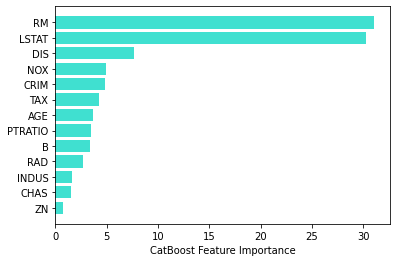

In [ ]:
sorted_feature_importance = model.feature_importances_.argsort() # отсортируем признаки по важности
# и построим график
plt.barh(boston.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

Еще более интересные графики можно построить библиотекой [shap](https://shap.readthedocs.io/en/latest/). Установим ее. Она рассчитывает и показывает величины влияния признаков на результат. 

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 6.8 MB/s 


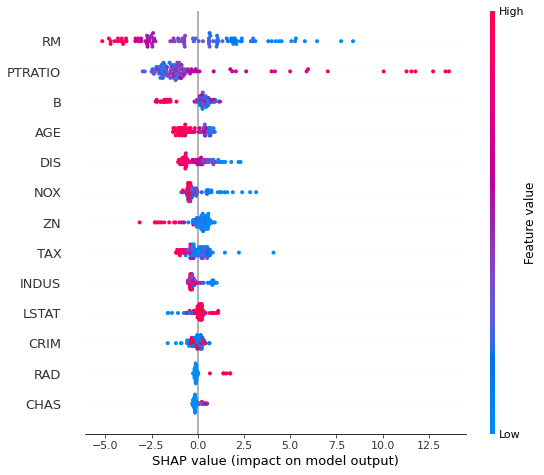

In [ ]:
import shap # подключим библиотеку
explainer = shap.TreeExplainer(model) # "объяснятор" для ансамблей деревьев 
shap_values = explainer.shap_values(X_test) # рассчитываем вклад признаков на тестовых данных
shap.summary_plot(shap_values, X_test, feature_names = boston.columns[sorted_feature_importance]) # строим картинку

По горизонтальной оси показана степень влияния признака на результат, цветом - величина признака. Как малые значения признака RM влияют на результат? 

В градиентном бустинге мы пытаемся скомпенсировать ошибки предыдущих моделей. Библиотека позволяет задать базовое решение (baseline), модель которую будем улучшать деревьями. Она задается выходами (и для обучения и для теста). 

In [ ]:
from sklearn.linear_model import Ridge # модель, которую будем использовать как базовую.
model_ridge=Ridge() # создаем
model_ridge.fit(X_train,y_train) # обучаем
model_ridge_train=model_ridge.predict(X_train) # считаем выходы для обучающих 
model_ridge_test=model_ridge.predict(X_test) # и тестовых данных

train_dataset = Pool(X_train, y_train, baseline=model_ridge_train) # пул для обучающих
test_dataset = Pool(X_test, y_test, baseline=model_ridge_test) #  пул для тестовых данных
model = CatBoostRegressor(loss_function='RMSE') # создаем ансамбль
model.fit(train_dataset,eval_set=test_dataset) # обучаем
pred=model.predict(test_dataset) # считаем выходы
r2_ridge = r2_score(y_test, model_ridge_test) # точночть базовой модели
r2 = r2_score(y_test, pred) # точночть ансамбля
print('Testing performance')
print('R2 Ridge: {:.2f}'.format(r2_ridge))
print('R2 Catboost: {:.2f}'.format(r2))

Learning rate set to 0.038823
0:	learn: 4.7012358	test: 4.6284073	best: 4.6284073 (0)	total: 2.75ms	remaining: 2.74s
1:	learn: 4.6571262	test: 4.6021302	best: 4.6021302 (1)	total: 5.49ms	remaining: 2.74s
2:	learn: 4.6078242	test: 4.5681933	best: 4.5681933 (2)	total: 7.8ms	remaining: 2.59s
3:	learn: 4.5650479	test: 4.5304724	best: 4.5304724 (3)	total: 10.1ms	remaining: 2.52s
4:	learn: 4.5295113	test: 4.5259337	best: 4.5259337 (4)	total: 12.8ms	remaining: 2.55s
5:	learn: 4.5016969	test: 4.5141861	best: 4.5141861 (5)	total: 15.2ms	remaining: 2.52s
6:	learn: 4.4638376	test: 4.4754166	best: 4.4754166 (6)	total: 17.5ms	remaining: 2.48s
7:	learn: 4.4312111	test: 4.4567378	best: 4.4567378 (7)	total: 19.9ms	remaining: 2.46s
8:	learn: 4.3996517	test: 4.4481285	best: 4.4481285 (8)	total: 22.2ms	remaining: 2.44s
9:	learn: 4.3505503	test: 4.4067670	best: 4.4067670 (9)	total: 24.4ms	remaining: 2.42s
10:	learn: 4.3110688	test: 4.3705121	best: 4.3705121 (10)	total: 26.9ms	remaining: 2.42s
11:	learn: 4

### Важное замечание

Никто не гарантирует, что добавление новых моделей в бустинге даст лучший результат, он может и ухудшиться.

Catboost по умолчанию возвращает лучшую из обученных моделей: если вы задали 100 моделей, а после добавления третьей началось ухудшение (на валидации), то в ансамбле останется три модели, остальные будут выброшены.


# Ссылки

Использованы и адаптированы материалы:

https://scikit-learn.org/stable/modules/classes.html?highlight=ensemble#module-sklearn.ensemble 

https://xgboost.readthedocs.io/en/latest/parameter.html

https://catboost.ai/ 

https://towardsdatascience.com/catboost-regression-in-6-minutes-3487f3e5b329 

## Домашнее задание

1. Повторите эксперимент, лабораторной работы.
2. Используя один из наборов данных, например, diabets проведите классификацию.
3. Оценить качество построенной модели, основываясь на матрице неточности и ROC-анализе.
